In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lab-001/im/Screenshot 2025-06-30 105302.png
/kaggle/input/lab-001/im/Screenshot 2025-06-30 105519.png
/kaggle/input/lab-001/im/Screenshot 2025-06-30 105338.png
/kaggle/input/lab-001/im/Screenshot 2025-06-30 104802.png
/kaggle/input/lab-001/im/Screenshot 2025-06-30 105445.png
/kaggle/input/lab-001/im/Screenshot 2025-06-30 105417.png
/kaggle/input/lab-001/im/Screenshot 2025-06-30 105223.png


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import perimeter
from scipy.spatial import distance



In [2]:
def show_image(img, title ='',cmap ='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [10]:
fig1_path ='/kaggle/input/lab-001/im/Screenshot 2025-06-30 104802.png'
fig2_path ='/kaggle/input/lab-001/im/Screenshot 2025-06-30 105223.png'
fig3_path ='/kaggle/input/lab-001/im/Screenshot 2025-06-30 105302.png'
fig4_path ='/kaggle/input/lab-001/im/Screenshot 2025-06-30 105338.png'
fig5_path ='/kaggle/input/lab-001/im/Screenshot 2025-06-30 105417.png'
fig6_path ='/kaggle/input/lab-001/im/Screenshot 2025-06-30 105445.png'
fig7_path ='/kaggle/input/lab-001/im/Screenshot 2025-06-30 105519.png'

In [11]:
fig1 = cv2.imread(fig1_path,cv2.IMREAD_GRAYSCALE)
fig2 = cv2.imread(fig2_path,cv2.IMREAD_GRAYSCALE)
fig3 = cv2.imread(fig3_path,cv2.IMREAD_GRAYSCALE)
fig4 = cv2.imread(fig4_path,cv2.IMREAD_GRAYSCALE)
fig5 = cv2.imread(fig5_path,cv2.IMREAD_GRAYSCALE)
fig6 = cv2.imread(fig6_path,cv2.IMREAD_GRAYSCALE)
fig7 = cv2.imread(fig7_path,cv2.IMREAD_GRAYSCALE)

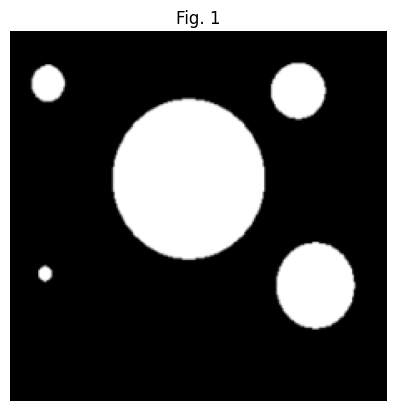

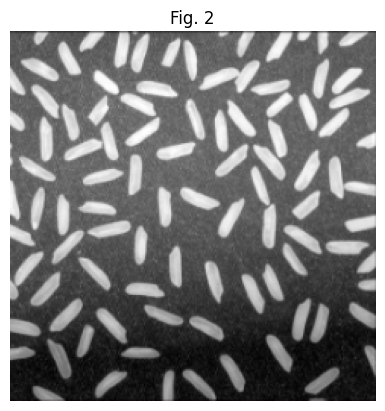

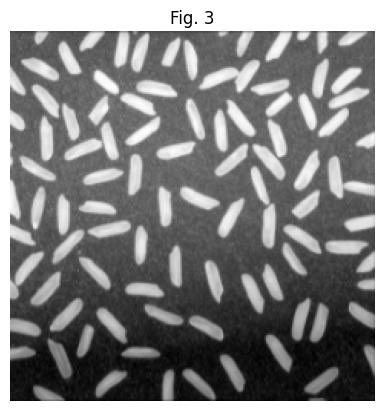

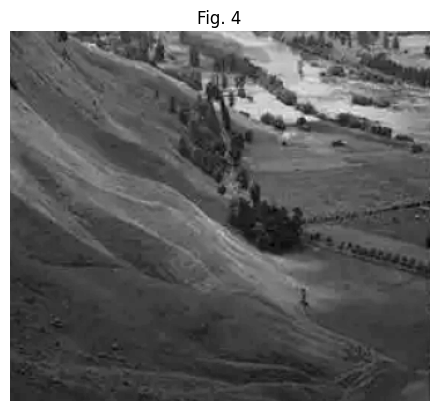

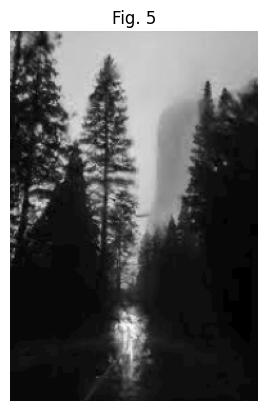

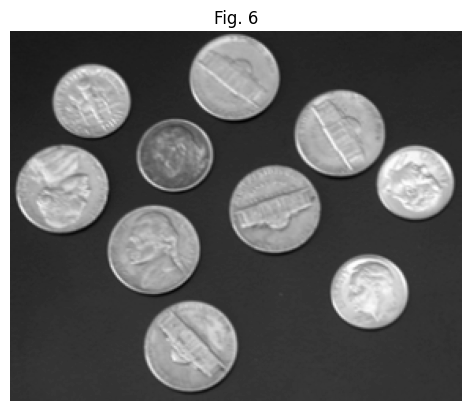

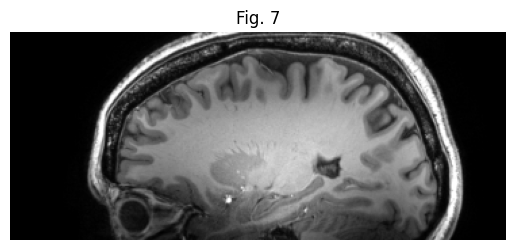

In [12]:
show_image(fig1,"Fig. 1")
show_image(fig2,"Fig. 2")
show_image(fig3,"Fig. 3")
show_image(fig4,"Fig. 4")
show_image(fig5,"Fig. 5")
show_image(fig6,"Fig. 6")
show_image(fig7,"Fig. 7")

In [14]:

from scipy.ndimage import binary_erosion
#convert grayscal to binary (0 or 1)
_, binary = cv2.threshold(fig1, 127, 1, cv2.THRESH_BINARY)

In [15]:

def compute_perimeter(binary_img, connectivity=4):
    struct = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]]) if connectivity == 4 else np.ones((3, 3))
    
    eroded = binary_erosion(binary_img, structure=struct).astype(int)
    perimeter = binary_img - eroded
    return perimeter, int(np.sum(perimeter))

In [16]:
perim4_img, perim4_count = compute_perimeter(binary, connectivity = 4)
perim8_img, perim8_count = compute_perimeter(binary, connectivity = 8)

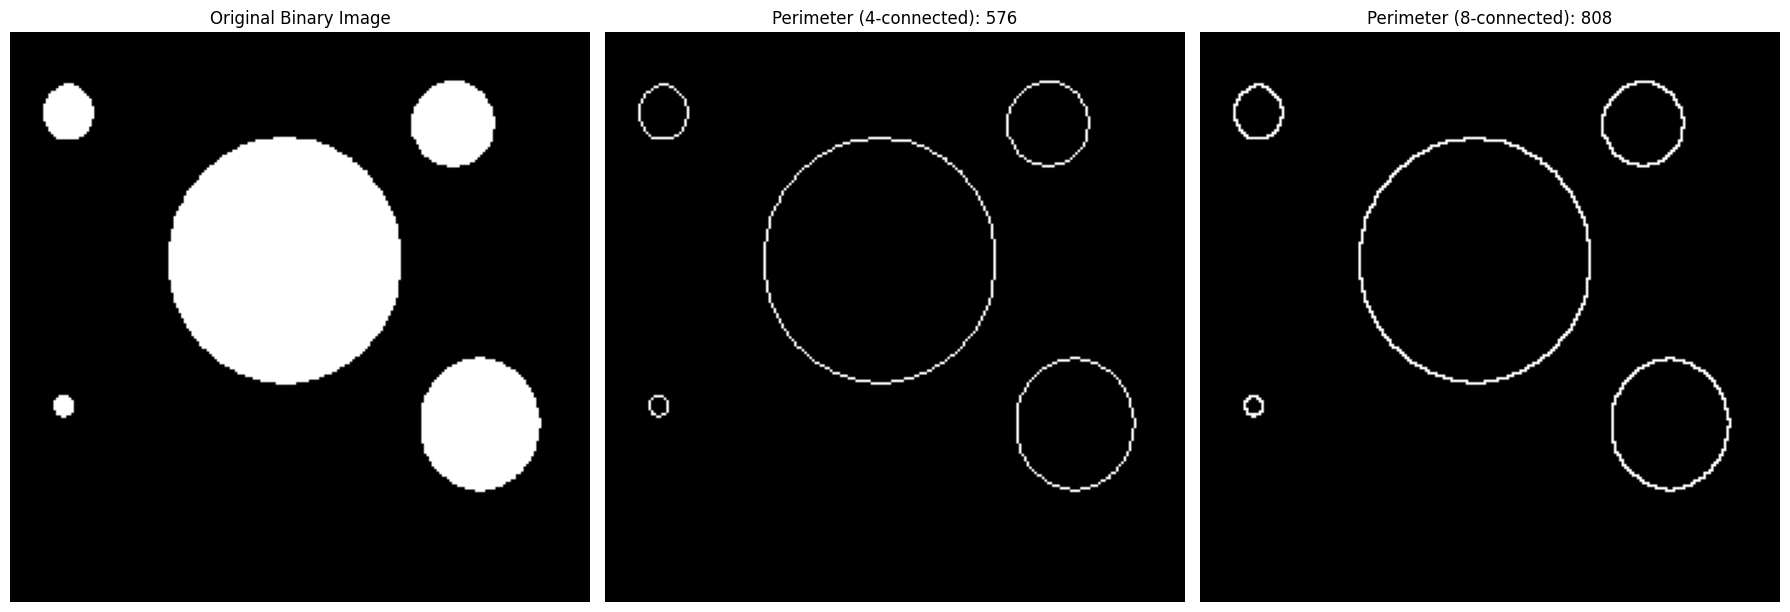

In [17]:
# Display original and both perimeter results
plt.figure(figsize=(18, 6))

# Original binary image
plt.subplot(1, 3, 1)
plt.title('Original Binary Image')
plt.imshow(binary, cmap='gray')
plt.axis('off')

# 4-connected perimeter
plt.subplot(1, 3, 2)
plt.title(f'Perimeter (4-connected): {perim4_count}')
plt.imshow(perim4_img, cmap='gray')
plt.axis('off')

# 8-connected perimeter
plt.subplot(1, 3, 3)
plt.title(f'Perimeter (8-connected): {perim8_count}')
plt.imshow(perim8_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
def show_image(fig2_path, title = "", cmap='gray'):
    plt.imshow(fig2_path, cmap = cmap)
    plt.title (title)
    plt.axis ('off')
    plt.show
   

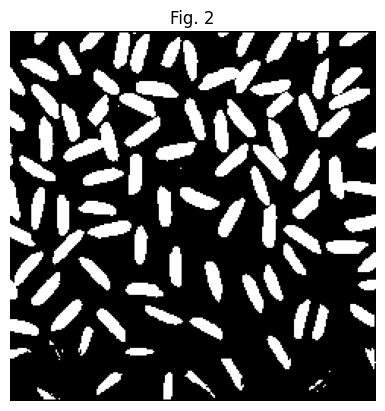

In [19]:
# fig_02 should be a grayscale image for thresholding
_, binary_img = cv2.threshold(fig2, 127, 255, cv2.THRESH_BINARY)

def show_image(image, title):
    plt.imshow(image, cmap='gray')  # Show image in grayscale
    plt.title(title)
    plt.axis('off')
    plt.show()

# Now show the binary thresholded image
show_image(binary_img, "Fig. 2")

In [20]:
num_labels, labels = cv2.connectedComponents(binary_img)

print(f"Number of objects: {num_labels - 1}")

Number of objects: 101


In [22]:
fig2 = cv2.resize(fig2, (fig1.shape[1], fig1.shape[0]))

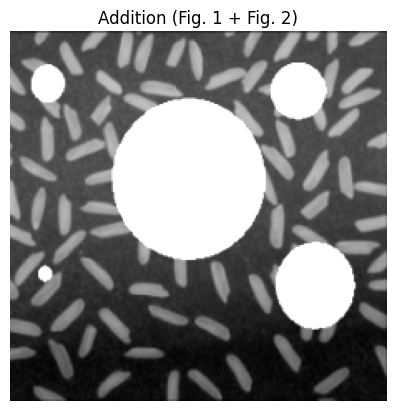

In [23]:
added_img = cv2.add(fig1, fig2)
show_image(added_img, "Addition (Fig. 1 + Fig. 2)")


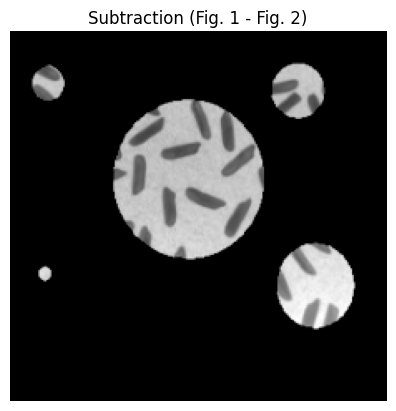

In [24]:
subtracted_img = cv2.subtract(fig1, fig2)
show_image(subtracted_img, "Subtraction (Fig. 1 - Fig. 2)")


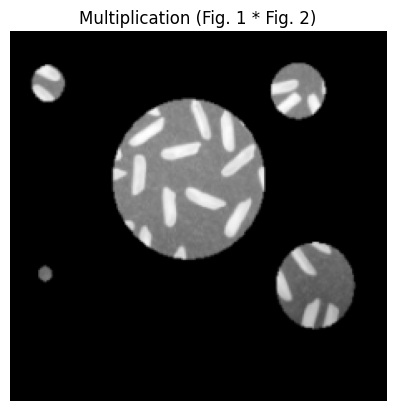

In [25]:
# Convert to float32 to avoid overflow during multiplication
fig1_float = fig1.astype(np.float32)
fig2_float = fig2.astype(np.float32)

multiplied_img = cv2.multiply(fig1_float, fig2_float) / 255  # scale back to 0-255
multiplied_img = np.clip(multiplied_img, 0, 255).astype(np.uint8)
show_image(multiplied_img, "Multiplication (Fig. 1 * Fig. 2)")


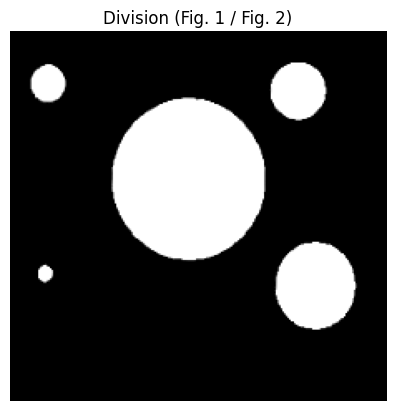

In [26]:
# Avoid division by zero
fig2_float[fig2_float == 0] = 1  

divided_img = cv2.divide(fig1_float, fig2_float) * 255
divided_img = np.clip(divided_img, 0, 255).astype(np.uint8)
show_image(divided_img, "Division (Fig. 1 / Fig. 2)")


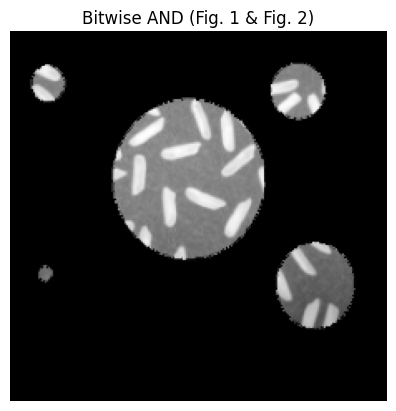

In [27]:
and_img = cv2.bitwise_and(fig1, fig2)
show_image(and_img, "Bitwise AND (Fig. 1 & Fig. 2)")


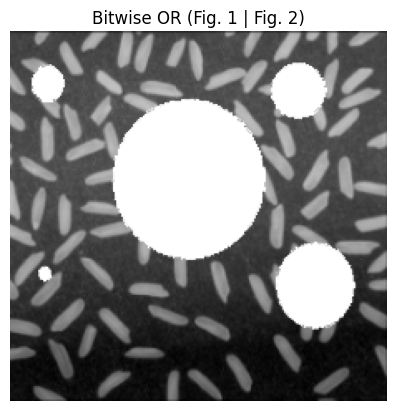

In [28]:
or_img = cv2.bitwise_or(fig1, fig2)
show_image(or_img, "Bitwise OR (Fig. 1 | Fig. 2)")


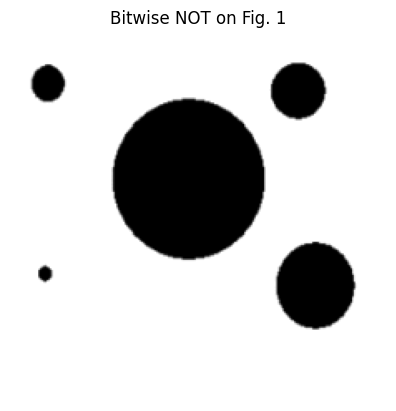

In [29]:
not_fig1 = cv2.bitwise_not(fig1)
show_image(not_fig1, "Bitwise NOT on Fig. 1")


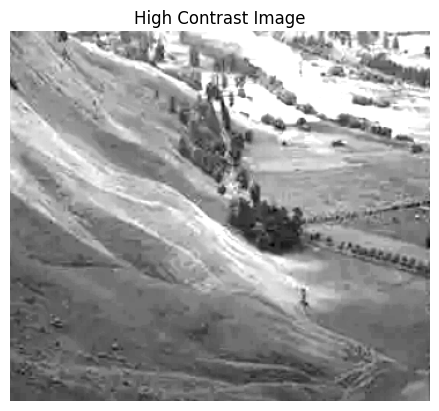

In [33]:
# Increase contrast by multiplying pixel values
contrast_img = cv2.convertScaleAbs(fig4, alpha=1.5, beta=0)  # alpha > 1 increases contrast
show_image(contrast_img, "High Contrast Image")


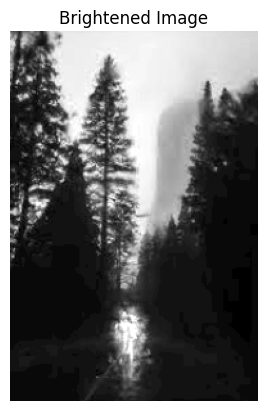

In [31]:
# Brighten image by adding a constant value (e.g., 50)
bright_img = cv2.add(fig5, 50)
show_image(bright_img, "Brightened Image")


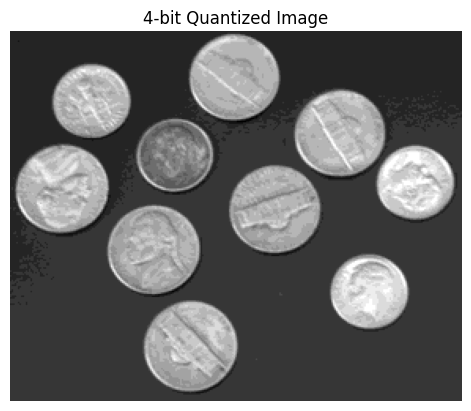

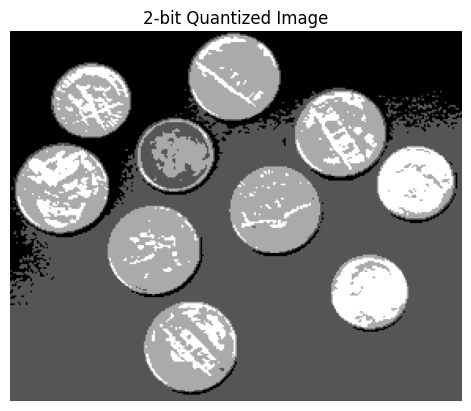

In [34]:
# 4-bit quantization (16 levels)
quant_4bit = (fig6 // 16) * 16
show_image(quant_4bit, "4-bit Quantized Image")

# 2-bit quantization (4 levels)
quant_2bit = (fig6 // 64) * 64
show_image(quant_2bit, "2-bit Quantized Image")


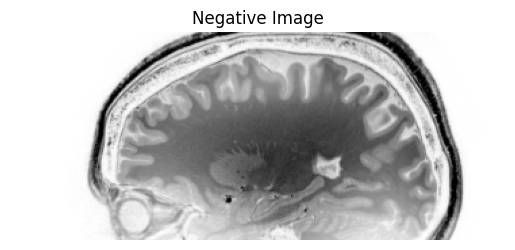

In [35]:
# Create a digital negative
negative_img = 255 - fig7
show_image(negative_img, "Negative Image")
